### 딥러닝

활성화함수>>
sigmoid : 0~1 사이 값으로.
relu : 0보다 작은 값은 0으로, 양수는 그대로.

train / test / validation
학습, 검증, 간접학습용(파라미터 최적화, 조기학습종료) (6:2:2)

### 1 오존 데이터

In [2]:
import pandas as pd
df=pd.read_csv('c:/vscode/data/ozone/ozone.csv')
df.head()

,Ozone,Ozone.1,Solar.R,Solar.R.1,Wind,Temp,Month,Day
0,41.0,41.00000,190.0,190.000000,7.4,67,5,1
1,36.0,36.00000,118.0,118.000000,8.0,72,5,2
2,12.0,12.00000,149.0,149.000000,12.6,74,5,3
3,18.0,18.00000,313.0,313.000000,11.5,62,5,4
4,NaN,42.12931,NaN,185.931507,14.3,56,5,5


In [4]:
X=df[['Solar.R.1','Wind','Temp']]
y=df['Ozone.1']

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7) 

In [17]:
from keras.models import Sequential
from keras.layers import Dense

model=Sequential()
#hidden층 3번 쌓기
model.add(Dense(8,input_shape=(len(X_train.columns),),activation='relu', name='input'))
model.add(Dense(4,activation='relu', name='hidden-1'))
model.add(Dense(2,activation='relu', name='hidden-2'))
model.add(Dense(1, name='output'))
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 8)                 32        
                                                                 
 hidden-1 (Dense)            (None, 4)                 36        
                                                                 
 hidden-2 (Dense)            (None, 2)                 10        
                                                                 
 output (Dense)              (None, 1)                 3         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


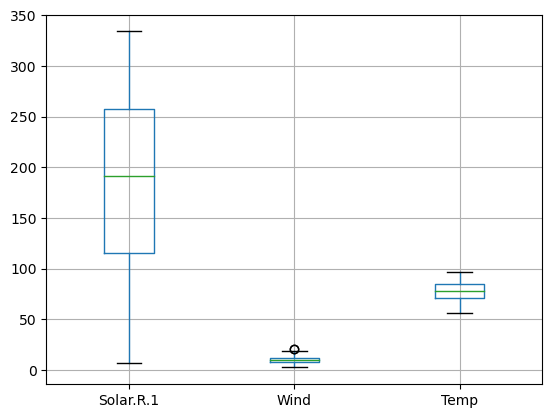

In [7]:
X_train.boxplot()
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)
X_train_scaled=pd.DataFrame(X_train_scaled)
X_test_scaled=pd.DataFrame(X_test_scaled)

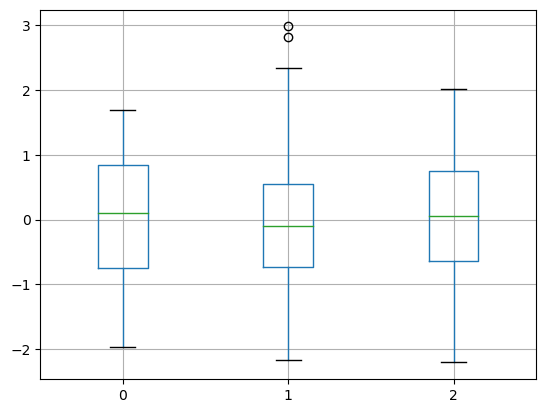

In [8]:
import matplotlib.pyplot as plt

X_train_scaled.boxplot()
plt.show()

In [26]:
from keras.callbacks import EarlyStopping
# 학습시키다가 효율 안 높아지면 중간에 멈추기
early_stopping = EarlyStopping(monitor='val_loss', patience=50)
hist = model.fit(X_train_scaled,y_train,epochs=500,validation_split=0.2,
               # batch_size=64    # 기본값=32 / batch/mini-batch/online
               callbacks=[early_stopping])

Epoch 1/500
4/4 [==============================] - 0s 25ms/step - loss: 388.1255 - mse: 388.1255 - mae: 15.6119 - val_loss: 260.7550 - val_mse: 260.7550 - val_mae: 12.7726
Epoch 2/500
4/4 [==============================] - 0s 11ms/step - loss: 388.1629 - mse: 388.1629 - mae: 15.6180 - val_loss: 261.8585 - val_mse: 261.8585 - val_mae: 12.7975
Epoch 3/500
4/4 [==============================] - 0s 11ms/step - loss: 388.2117 - mse: 388.2117 - mae: 15.6267 - val_loss: 262.3108 - val_mse: 262.3108 - val_mae: 12.8077
Epoch 4/500
4/4 [==============================] - 0s 11ms/step - loss: 388.1612 - mse: 388.1612 - mae: 15.6252 - val_loss: 262.0003 - val_mse: 262.0003 - val_mae: 12.7984
Epoch 5/500
4/4 [==============================] - 0s 17ms/step - loss: 388.0066 - mse: 388.0066 - mae: 15.6189 - val_loss: 262.6808 - val_mse: 262.6808 - val_mae: 12.8060
Epoch 6/500
4/4 [==============================] - 0s 11ms/step - loss: 388.2812 - mse: 388.2812 - mae: 15.6341 - val_loss: 266.3522 - val_m

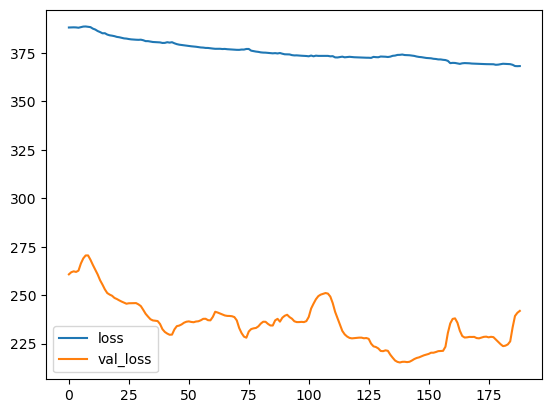

In [27]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

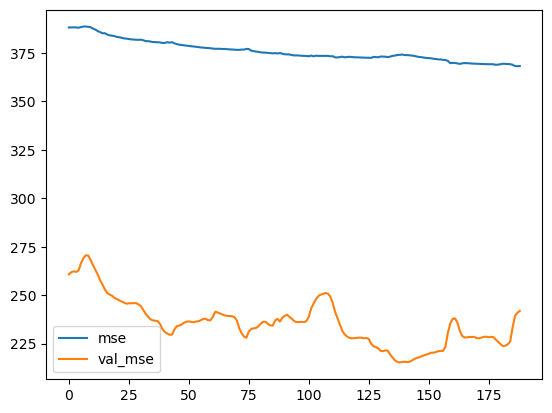

In [28]:
plt.plot(hist.history['mse'])
plt.plot(hist.history['val_mse'])
plt.legend(['mse','val_mse'])
plt.show()

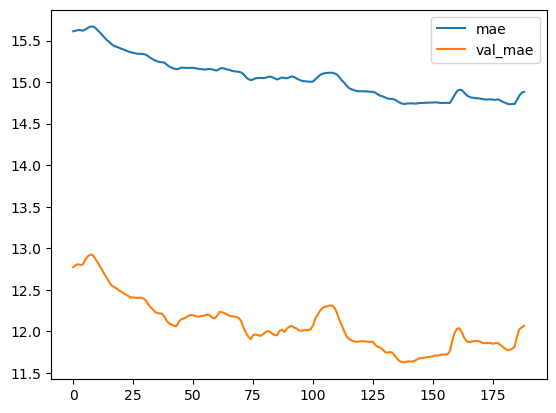

In [29]:
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.legend(['mae','val_mae'])
plt.show()

In [30]:
scores=model.evaluate(X_train_scaled,y_train)
print(scores)

scores=model.evaluate(X_test_scaled,y_test)
print(scores)

4/4 [==============================] - 0s 2ms/step - loss: 342.3136 - mse: 342.3136 - mae: 14.3077
[342.3136291503906, 342.3136291503906, 14.30769157409668]
1/1 [==============================] - 0s 26ms/step - loss: 234.9593 - mse: 234.9593 - mae: 12.1996
[234.9593048095703, 234.9593048095703, 12.199560165405273]


In [31]:
from sklearn.metrics import r2_score

pred=model.predict(X_test_scaled)
r2_score(y_test, pred)

1/1 [==============================] - 0s 56ms/step


0.5941242728196541

### 2 당뇨 데이터

In [32]:
from sklearn.datasets import load_diabetes

diabetes=load_diabetes()

In [33]:
X=diabetes.data
y=diabetes.target

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7) 

In [35]:
from keras.models import Sequential     #신경망 모델
from keras.layers import Dense

model=Sequential()
model.add(Dense(24,input_shape=(X_train.shape[1],),activation='relu', name='input'))
model.add(Dense(12,activation='relu', name='hidden-1'))
model.add(Dense(6,activation='relu', name='hidden-2'))
model.add(Dense(1, name='output'))
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 24)                264       
                                                                 
 hidden-1 (Dense)            (None, 12)                300       
                                                                 
 hidden-2 (Dense)            (None, 6)                 78        
                                                                 
 output (Dense)              (None, 1)                 7         
                                                                 
Total params: 649
Trainable params: 649
Non-trainable params: 0
_________________________________________________________________


In [47]:
import pandas as pd

pd.DataFrame(X_train).boxplot()

<AxesSubplot:>

In [38]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=50)
hist=model.fit(X_train,y_train,epochs=500,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/500
9/9 [==============================] - 1s 23ms/step - loss: 30437.5664 - mse: 30437.5664 - mae: 155.1972 - val_loss: 27684.7793 - val_mse: 27684.7793 - val_mae: 149.5421
Epoch 2/500
9/9 [==============================] - 0s 5ms/step - loss: 30421.2480 - mse: 30421.2480 - mae: 155.1434 - val_loss: 27667.5273 - val_mse: 27667.5273 - val_mae: 149.4843
Epoch 3/500
9/9 [==============================] - 0s 5ms/step - loss: 30402.3047 - mse: 30402.3047 - mae: 155.0828 - val_loss: 27647.5547 - val_mse: 27647.5547 - val_mae: 149.4180
Epoch 4/500
9/9 [==============================] - 0s 5ms/step - loss: 30379.7910 - mse: 30379.7910 - mae: 155.0108 - val_loss: 27623.3887 - val_mse: 27623.3887 - val_mae: 149.3378
Epoch 5/500
9/9 [==============================] - 0s 5ms/step - loss: 30352.6484 - mse: 30352.6484 - mae: 154.9229 - val_loss: 27593.4336 - val_mse: 27593.4336 - val_mae: 149.2387
Epoch 6/500
9/9 [==============================] - 0s 5ms/step - loss: 30317.9902 - mse: 30317

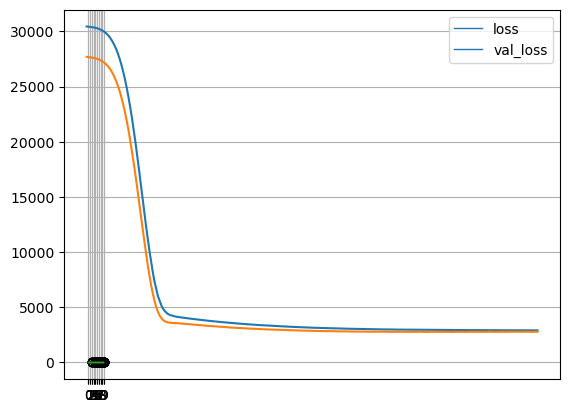

In [39]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

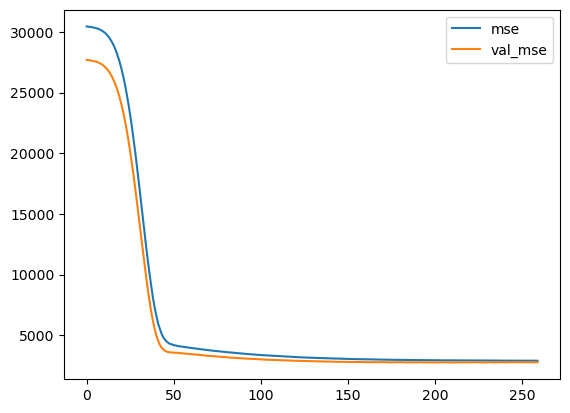

In [40]:
plt.plot(hist.history['mse'])
plt.plot(hist.history['val_mse'])
plt.legend(['mse','val_mse'])
plt.show()

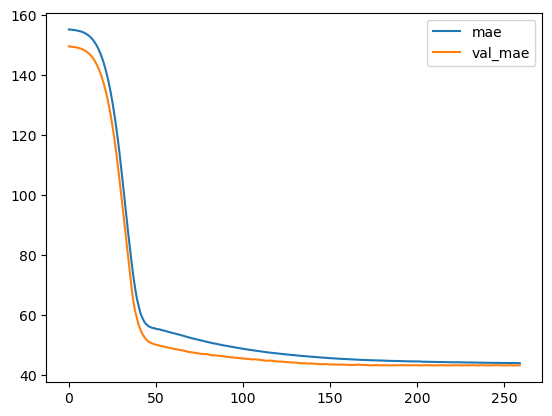

In [41]:
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.legend(['mae','val_mae'])
plt.show()

In [43]:
scores = model.evaluate(X_train,y_train)
print(scores)
scores=model.evaluate(X_test,y_test)
print(scores)

12/12 [==============================] - 0s 1ms/step - loss: 2883.8750 - mse: 2883.8750 - mae: 43.7268
[2883.875, 2883.875, 43.72677993774414]
3/3 [==============================] - 0s 2ms/step - loss: 2985.5312 - mse: 2985.5312 - mae: 42.5222
[2985.53125, 2985.53125, 42.52216339111328]


In [44]:
from sklearn.metrics import r2_score

pred=model.predict(X_test)
r2_score(y_test, pred)

3/3 [==============================] - 0s 1ms/step


0.40038733490842815